In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.drop('Gender', axis=1, inplace=True)
df.drop('User ID', axis=1, inplace=True)

In [12]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [20]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1),
                                                df['Purchased'],test_size=0.3,
                                                random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [18]:
X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After scaling')

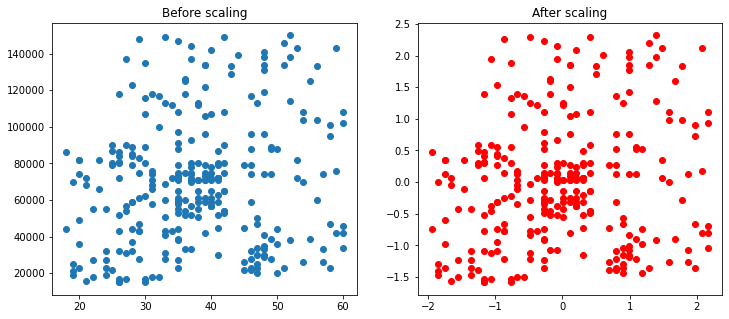

In [26]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")

<AxesSubplot:title={'center':'After scaling'}, xlabel='Age', ylabel='Density'>

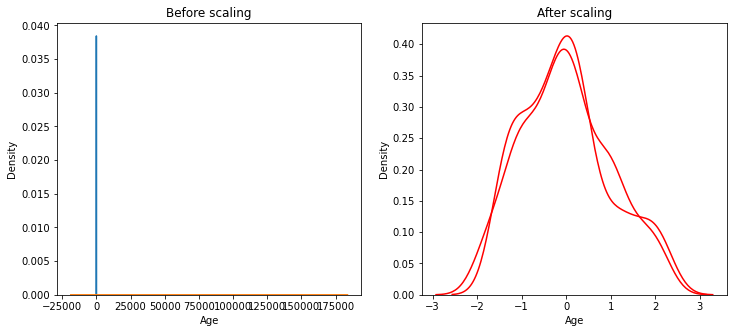

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(X_train['Age'] ,ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'] ,ax=ax1)

#after scaling
ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2,color='red')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,color='red')


In [30]:
#Apply models

from sklearn.linear_model import LogisticRegression


In [31]:
lr=LogisticRegression()
lr_scaled = LogisticRegression()

In [33]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('Accuracy of Actual data using :',accuracy_score(y_test,y_pred))
print('Accuracy of scaled data using :',accuracy_score(y_test,y_pred_scaled))

Accuracy of Actual data using : 0.6583333333333333
Accuracy of scaled data using : 0.8666666666666667


# this type of scalling not work on Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()
dt_scaled =DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [46]:
print('Accuracy of Actual data using :',accuracy_score(y_test,y_pred))
print('Accuracy of scaled data using :',accuracy_score(y_test,y_pred_scaled))

Accuracy of Actual data using : 0.875
Accuracy of scaled data using : 0.875
